# Basic Rotation Gates

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `XPowGate`
A gate that rotates around the X axis of the Bloch sphere.

The unitary matrix of `XPowGate(exponent=t, global_shift=s)` is:
$$
e^{i \pi t (s + 1/2)}
\begin{bmatrix}
  \cos(\pi t /2) & -i \sin(\pi t /2) \\
  -i \sin(\pi t /2) & \cos(\pi t /2)
\end{bmatrix}
$$

Note in particular that this gate has a global phase factor of
$e^{i \pi t / 2}$ vs the traditionally defined rotation matrices
about the Pauli X axis. See `Rx` for rotations without the global
phase. The global phase factor can be adjusted by using the `global_shift`
parameter when initializing.

#### Parameters
 - `exponent`: The t in gate**t. Determines how much the eigenvalues of the gate are phased by. For example, eigenvectors phased by -1 when `gate**1` is applied will gain a relative phase of e^{i pi exponent} when `gate**exponent` is applied (relative to eigenvectors unaffected by `gate**1`).
 - `global_shift`: Offsets the eigenvalues of the gate at exponent=1. In effect, this controls a global phase factor on the gate's unitary matrix. The factor for global_shift=s is:     exp(i * pi * s * t)
 - `eps`: precision for implementation of rotation. 

#### Registers
 - `q`: One-bit register. 

#### References
 - [Efficient synthesis of universal Repeat-Until-Success circuits](https://arxiv.org/abs/1404.5320). Offers a small improvement
 - [Optimal ancilla-free Clifford+T approximation of z-rotations](https://arxiv.org/pdf/1403.2975.pdf). 


In [2]:
from qualtran.bloqs.basic_gates import XPowGate

### Example Instances

In [3]:
x_pow = XPowGate(exponent=0.123, eps=1e-8)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([x_pow],
           ['`x_pow`'])

### Call Graph

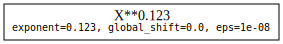

#### Counts totals:
 - `X**0.123`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
x_pow_g, x_pow_sigma = x_pow.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(x_pow_g)
show_counts_sigma(x_pow_sigma)

## `YPowGate`
A gate that rotates around the Y axis of the Bloch sphere.

The unitary matrix of `YPowGate(exponent=t)` is:
$$
    \begin{bmatrix}
        e^{i \pi t /2} \cos(\pi t /2) & - e^{i \pi t /2} \sin(\pi t /2) \\
        e^{i \pi t /2} \sin(\pi t /2) & e^{i \pi t /2} \cos(\pi t /2)
    \end{bmatrix}
$$

Note in particular that this gate has a global phase factor of
$e^{i \pi t / 2}$ vs the traditionally defined rotation matrices
about the Pauli Y axis. See `Ry` for rotations without the global
phase. The global phase factor can be adjusted by using the `global_shift`
parameter when initializing.

#### Parameters
 - `exponent`: The t in gate**t. Determines how much the eigenvalues of the gate are phased by. For example, eigenvectors phased by -1 when `gate**1` is applied will gain a relative phase of e^{i pi exponent} when `gate**exponent` is applied (relative to eigenvectors unaffected by `gate**1`). 
 - `global_shift`: Offsets the eigenvalues of the gate at exponent=1. In effect, this controls a global phase factor on the gate's unitary matrix. The factor for global_shift=s is:     exp(i * pi * s * t)
 - `eps`: precision for implementation of rotation. 

#### Registers
 - `q`: One-bit register. 

#### References
 - [Efficient synthesis of universal Repeat-Until-Success circuits](https://arxiv.org/abs/1404.5320). Offers a small improvement
 - [Optimal ancilla-free Clifford+T approximation of z-rotations](https://arxiv.org/pdf/1403.2975.pdf). 


In [6]:
from qualtran.bloqs.basic_gates import YPowGate

### Example Instances

In [7]:
y_pow = YPowGate(exponent=0.123, eps=1e-8)

#### Graphical Signature

In [8]:
from qualtran.drawing import show_bloqs
show_bloqs([y_pow],
           ['`y_pow`'])

### Call Graph

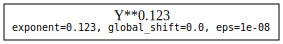

#### Counts totals:
 - `Y**0.123`: 1

In [9]:
from qualtran.resource_counting.generalizers import ignore_split_join
y_pow_g, y_pow_sigma = y_pow.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(y_pow_g)
show_counts_sigma(y_pow_sigma)

## `ZPowGate`
A gate that rotates around the Z axis of the Bloch sphere.

The unitary matrix of `ZPowGate(exponent=t, global_shift=s)` is:
$$
    e^{i \pi s t}
    \begin{bmatrix}
        1 & 0 \\
        0 & e^{i \pi t}
    \end{bmatrix}
$$

Note in particular that this gate has a global phase factor of
$e^{i\pi t/2}$ vs the traditionally defined rotation matrices
about the Pauli Z axis. See `Rz` for rotations without the global
phase. The global phase factor can be adjusted by using the `global_shift`
parameter when initializing.

#### Parameters
 - `exponent`: The t in gate**t. Determines how much the eigenvalues of the gate are phased by. For example, eigenvectors phased by -1 when `gate**1` is applied will gain a relative phase of e^{i pi exponent} when `gate**exponent` is applied (relative to eigenvectors unaffected by `gate**1`).
 - `global_shift`: Offsets the eigenvalues of the gate at exponent=1. In effect, this controls a global phase factor on the gate's unitary matrix. The factor for global_shift=s is:     exp(i * pi * s * t)
 - `eps`: precision for implementation of rotation. 

#### Registers
 - `qubits`: One-bit register. 

#### References
 - [Efficient synthesis of universal Repeat-Until-Success circuits](https://arxiv.org/abs/1404.5320). Offers a small improvement
 - [Optimal ancilla-free Clifford+T approximation of z-rotations](https://arxiv.org/pdf/1403.2975.pdf). 


In [10]:
from qualtran.bloqs.basic_gates import ZPowGate

### Example Instances

In [11]:
z_pow = ZPowGate(exponent=0.123, eps=1e-8)

#### Graphical Signature

In [12]:
from qualtran.drawing import show_bloqs
show_bloqs([z_pow],
           ['`z_pow`'])

### Call Graph

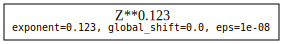

#### Counts totals:
 - `Z**0.123`: 1

In [13]:
from qualtran.resource_counting.generalizers import ignore_split_join
z_pow_g, z_pow_sigma = z_pow.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(z_pow_g)
show_counts_sigma(z_pow_sigma)